In [63]:
import collections
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
import pandas as pd
import glob
import re
import json
from scipy import stats
import os
import itertools
import bisect

chunk_sizes_ = [63171, 65535, 4427, 65535, 4702, 65535, 5149, 65535, 4768, 65535, 4351, 65535, 4875, 65535, 5292, 65535, 2276, 65535, 2602, 65535, 2747, 65535, 2600, 65535, 2566, 65535, 2200, 65535, 3376, 65535, 2779, 65535, 2176, 65535, 3521, 65535, 2083, 65535, 2528, 65535, 2168, 65535, 2658, 65535, 3041, 65535, 3120, 65535, 2558, 65535, 2717, 65535, 2582, 65535, 2134, 65535, 2388, 65535, 2755, 65535, 2688, 59138, 63841, 65535, 4586, 65535, 4685, 65535, 4736, 65535, 5099, 65535, 4831, 65535, 4942, 65535, 5521, 65535, 2339, 65535, 2495, 65535, 2596, 65535, 2571, 65535, 2735, 65535, 2455, 65535, 2836, 65535, 3141, 65535, 3066, 65535, 3156, 65535, 2495, 65535, 1844, 65535, 2313, 65535, 2612, 65535, 3017, 65535, 2911, 65535, 2377, 65535, 2841, 65535, 2903, 65535, 2016, 65535, 2299, 65535, 2496, 65535, 2343, 58954, 47296, 52954, 52703, 52389, 53230, 53110, 53276, 52886, 50913, 50895, 51180, 50548, 50525, 50911, 51196, 51408, 51118, 50985, 50788, 50915, 51129, 51033, 51321, 50903, 51183, 50824, 51240, 51194, 51245, 51042, 50915, 44672,]
chunk_sizes_ = [63171, 63841, 47296, 65535, 4427, 65535, 4586, 52954, 65535, 4702, 65535, 4685, 52703, 65535, 5149, 65535, 4736, 52389, 65535, 4768, 65535, 5099, 53230, 65535, 4351, 65535, 4831, 53110, 65535, 4875, 65535, 4942, 53276, 65535, 5292, 65535, 5521, 52886, 65535, 65535, 50913, 65535, 65535, 50895, 65535, 65535, 51180, 65535, 65535, 50548, 65535, 65535, 50525, 65535, 65535, 50911, 65535, 65535, 51196, 65535, 65535, 51408, 65535, 65535, 51118, 65535, 65535, 50985, 65535, 65535, 50788, 65535, 65535, 50915, 65535, 65535, 51129, 65535, 65535, 51033, 65535, 65535, 51321, 65535, 65535, 50903, 65535, 65535, 51183, 65535, 65535, 50824, 65535, 65535, 51240, 65535, 65535, 51194, 65535, 65535, 51245, 65535, 65535, 51042, 65535, 65535, 50915, 59138, 58954, 44672, 65535, 54585, ]
chunk_sizes = [63171, 63841, 47296, 65535, 65535, 52954, 65535, 65535, 52703, 65535, 65535, 52389, 65535, 65535, 53230, 65535, 65535, 53110, 65535, 65535, 53276, 65535, 65535, 52886, 65535, 65535, 50913, 65535, 65535, 50895, 65535, 65535, 51180, 65535, 65535, 50548, 65535, 65535, 50525, 65535, 65535, 50911, 65535, 65535, 51196, 65535, 65535, 51408, 65535, 65535, 51118, 65535, 65535, 50985, 65535, 65535, 50788, 65535, 65535, 50915, 65535, 65535, 51129, 65535, 65535, 51033, 65535, 65535, 51321, 65535, 65535, 50903, 65535, 65535, 51183, 65535, 65535, 50824, 65535, 65535, 51240, 65535, 65535, 51194, 65535, 65535, 51245, 65535, 65535, 51042, 65535, 65535, 50915, 59138, 58954, 44672, 65535, 65535, 57014, ]

In [5]:
bins = [0, 100, 500, 1000, 2000, 4000, 8000, 16000, 32000, 48000, 55000, 65535]

def chunks_with_x_elements(low, high, upper_exclusive=True):
    if upper_exclusive:        
        filtered = filter(lambda x: low <= x and x < high, chunk_sizes)
    else:
        filtered = filter(lambda x: low <= x and x <= high, chunk_sizes)
            
    return len(list(filtered))

chunks_per_bin = [chunks_with_x_elements(low, high ) for low, high in zip(bins, bins[1:])]
chunks_per_bin.append(chunks_with_x_elements(65535, 65535, False))


labels_per_bin = [str(low) + "-" + str(high-1) for low, high in zip(bins, bins[1:])]
labels_per_bin.append(str(65535))

print(chunks_per_bin)

assert sum(chunks_per_bin) == len(chunk_sizes), "Bug"

[0, 0, 0, 0, 0, 0, 0, 0, 2, 30, 5, 62]


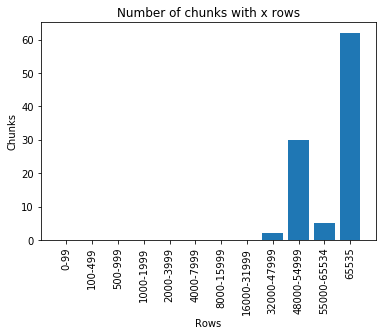

In [6]:
num_bins = np.arange(len(bins))

plt.bar(num_bins, chunks_per_bin)
plt.title("Number of chunks with x rows")
plt.xlabel("Rows")
plt.ylabel("Chunks")
plt.xticks(num_bins, labels_per_bin, rotation='vertical')

plt.show()

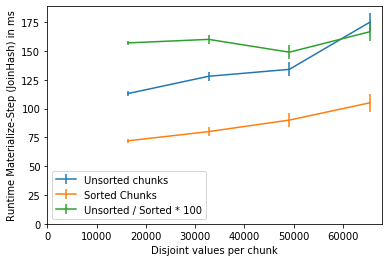

In [7]:
distinct_values = [65535/4*1, 65535/4*2, 65535/4*3, 65535/4*4]
yerr = np.arange(1, 5) * 2

runtimes = [113, 128, 134, 175]
plt.errorbar(distinct_values, runtimes, yerr=yerr, label='Unsorted chunks')

runtimes_sorted = [72, 80, 90, 105]
plt.errorbar(distinct_values, runtimes_sorted, yerr=yerr, label='Sorted Chunks')

runtimes_sorted_influence = np.array(runtimes) / np.array(runtimes_sorted) * 100
plt.errorbar(distinct_values, runtimes_sorted_influence, yerr=yerr, label='Unsorted / Sorted * 100')

#runtimes_mixed = [94, 113, 132, 151, 170]
#plt.errorbar([0]+distinct_values, runtimes_mixed, yerr=[1,2,3,4,5])

#speedups = np.array([175/113, 175/128, 175/134, 175/175]) * 100
#plt.errorbar(distinct_values, speedups, yerr=yerr)

#speedups_guess = np.array([175/95, 175/175]) * 100
#plt.errorbar([0, 65535], speedups_guess)

plt.xlim(xmin=0)
plt.xlabel("Disjoint values per chunk")
plt.ylim(ymin=0)
plt.ylabel("Runtime Materialize-Step (JoinHash) in ms")
plt.legend()
plt.show()

In [ ]:
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    adjust_yaxis(ax2,(y1-y2)/2,v2)
    adjust_yaxis(ax1,(y2-y1)/2,v1)

def adjust_yaxis(ax,ydif,v):
    """shift axis ax by ydiff, maintaining point v at the same location"""
    inv = ax.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, ydif))
    miny, maxy = ax.get_ylim()
    miny, maxy = miny - v, maxy - v
    if -miny>maxy or (-miny==maxy and dy > 0):
        nminy = miny
        nmaxy = miny*(maxy+dy)/(miny+dy)
    else:
        nmaxy = maxy
        nminy = maxy*(miny+dy)/(maxy+dy)
    ax.set_ylim(nminy+v, nmaxy+v)

In [ ]:
queries = [3, 4, 5, 6, 7, 9, 12, 14, 15, 18, 20, 21]
queries = [str(x) for x in queries]
throughput = np.array([25, -21, -14, 318, 38, -16, 68, 88, 146, -24, 166, -15])
latency = [251, 132, 435, 35, 177, 948, 146, 80, 45, 998, 90, 725]

x = np.arange(len(queries))  # the label locations
width = 0.35  # the width of the bars

assert len(queries) == len(throughput), "Mismatch 1"
assert len(queries) == len(latency), "Mismatch 2"
print(f"Considering {len(queries)} queries")

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('TPC-H Query')
ax1.set_xticks(x)
ax1.set_xticklabels(queries)
ax1.set_ylabel('Change in %', color='black')
throughput_bar = ax1.bar(x - width/2, throughput, width, label='Throughput', color=color)
ax1.tick_params(axis='y', labelcolor='black')
#ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Milliseconds', color='black')  # we already handled the x-label with ax1
latency_bar = ax2.bar(x + width/2, latency, width, label='Latency', color=color)
ax2.tick_params(axis='y', labelcolor='black')
#ax2.legend()

align_yaxis(ax1, 0, ax2, 0)

plt.legend([throughput_bar, latency_bar], ['Throughput', 'Latency'])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('/home/aloeser/Downloads/throughput_latency.pdf')
plt.show()

32945.669379
33336.943587
347


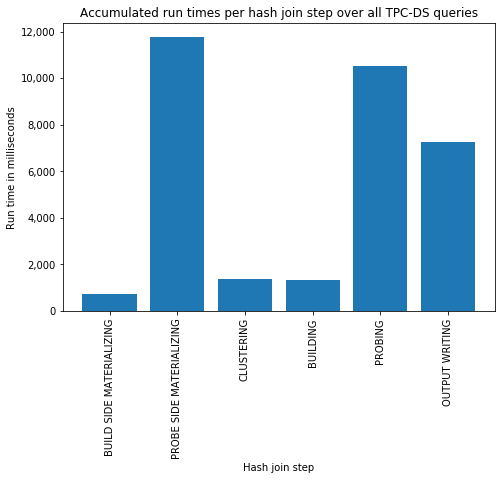

In [41]:
# Graph for the total runtime per hash join step
BENCHMARK = "TPC-DS"
if BENCHMARK == "TPC-H":
    JOIN_STATISTICS_PATH = f"~/Dokumente/repos/example_plugin/stats/final/tpch/sf10/01-l_orderkey-100/joins.csv"
elif BENCHMARK == "TPC-DS":
    JOIN_STATISTICS_PATH = f"~/Dokumente/repos/example_plugin/stats/final/tpcds/sf10-2d/nosort/joins.csv"
else:
    raise Exception("Unknown benchmark: " + BENCHMARK)

# TODO: when using more than one run: multiply operator runtimes with their query frequencies

ALL = 0
ONLY_CLUSTERING = 1
NO_CLUSTERING = 2
CLUSTERING_STATE = 0

joins = pd.read_csv(JOIN_STATISTICS_PATH, sep='|')
joins = joins.dropna()
if CLUSTERING_STATE == ONLY_CLUSTERING:
    joins = joins[joins['RADIX_BITS'] > 0]
elif CLUSTERING_STATE == NO_CLUSTERING:
    joins = joins[joins['RADIX_BITS'] == 0]

sum_columns = ['BUILD_SIDE_MATERIALIZING_NS', 'PROBE_SIDE_MATERIALIZING_NS', 'CLUSTERING_NS', 'BUILDING_NS', 'PROBING_NS', 'OUTPUT_WRITING_NS']
sums = []
sum_names = list(map(lambda x: x[:-3].replace('_', ' '), sum_columns))

for sum_column in sum_columns:
    sums.append(joins[sum_column].sum() / 1e6)


#fig, ax = plt.subplots()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(sum_names, sums)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel('Hash join step')
ax.set_ylabel('Run time in milliseconds')
ax.set_title(f'Accumulated run times per hash join step over all {BENCHMARK} queries')
plt.xticks(rotation=90)


filename = '/home/aloeser/Downloads/hash_join_steps_time'
if CLUSTERING_STATE == ALL:
    filename += "_all"
elif CLUSTERING_STATE == ONLY_CLUSTERING:
    filename += "_only_clustering"
elif CLUSTERING_STATE == NO_CLUSTERING:
    filename += "_no_clustering"
else:
    assert False
    
filename += f"_{BENCHMARK.lower().replace('-', '')}"
plt.savefig(f"{filename}.pdf", bbox_inches="tight")


print(sum(sums))
print(joins['RUNTIME_NS'].sum() / 1e6)
print(len(joins))

plt.show()



In [2]:
def extract_average_latencies(benchmark_folder):
    latencies = []
    for file in sorted(glob.glob(f"{benchmark_folder}/*.json")):
        with open(file, 'r') as f:
            benchmark_json = json.load(f)
        latencies.append(extract_average_latency(benchmark_json))
    
    return latencies

    
def extract_average_latency(benchmark_json, num_runs=20):
    benchmarks = benchmark_json['benchmarks']
    total_latency = 0
    
    for benchmark in benchmarks:
        assert len(benchmark['successful_runs']) == num_runs, f"Expected {num_runs} succesful runs per query"
        for run in benchmark['successful_runs']:
            total_latency += float(run['duration'])
            
    return total_latency / num_runs


In [3]:
def extract_cluster_counts(benchmark_folder, clustering_columns):
    all_counts = []
    for file in sorted(glob.glob(f"{benchmark_folder}/*.json")):
        with open(file, 'r') as f:
            benchmark_json = json.load(f)
        config = benchmark_json['clustering_info']['config']
        if "tpch" in benchmark_folder:
            config = config['lineitem']
        elif "tpcds" in benchmark_folder:
            config = config['store_sales']
        else:
            raise Exception("unknown benchmark")        
        
        counts = [1] * len(clustering_columns)
        for entry in config:
            # Skip sort column
            if entry[1] > 1:
                counts[clustering_columns.index(entry[0])] = entry[1]
        all_counts.append(counts)
    return pd.DataFrame(all_counts, columns=clustering_columns)
            
    

#extract_cluster_counts("/home/aloeser/Dokumente/repos/hyrise/benchmark_results/final/tpch/sf10-2d", ['l_receiptdate', 'l_shipdate', 'l_quantity', 'l_discount', 'l_partkey', 'l_suppkey', 'l_orderkey'])

In [5]:
def add_cluster_count_table(benchmark_folder, potential_clustering_columns, column_names, ax):
    def format_cluster_count(row):
        num_clusters = row['num_clusters']
        if 1.8 *  num_clusters < default_chunks:
            new_cluster_count = np.int64(row[sort_column] * round(default_chunks / row['num_clusters']))
            return str(new_cluster_count)
            #return f"{row[sort_column]} ({new_cluster_count})"
        else:
            return str(row[sort_column])

    table_df = extract_cluster_counts(benchmark_folder, potential_clustering_columns)
    table_df['num_clusters'] = table_df.product(axis=1)
    #table_df[sort_column] = table_df.apply(format_cluster_count, axis=1)
    table_df.drop('num_clusters', inplace=True, axis=1)
    table_df = table_df.transpose()

    the_table = ax.table(cellText=table_df.values,
                          colLabels=column_names,
                          rowLabels=potential_clustering_columns,
                          loc='center', bbox=[0, -0.0842 * len(potential_clustering_columns), 1, len(potential_clustering_columns) * 0.0821]) #


    ax.set_xticks([])
    for index, column in enumerate(potential_clustering_columns):
        for rank in range(len(column_names)):        
            if pd.isna(table_df.loc[column, rank]) or table_df.loc[column, rank] == 1:
                the_table[ (index+1, rank)].set_text_props(text="")
            #else:
            #    the_table[ (index+1, rank)].get_text().set_weight('bold')
    return the_table

[113365.45704265 113365.45704265 135667.33355065 121118.00137395
 121015.11276085 122106.47233335 137730.7366561  123642.12992575
 112489.21380875 115618.5784726  116044.3052439  120957.1315512
 134884.93365095 133993.6602361  122708.91399375 124167.96190715
 116078.3695687  115980.3996175  120665.42383085 134894.6425131
 136919.44096115]
[113365.45704265 113248.24678595 135667.33355065 124036.04273965
 123894.1249488  121044.02141945 122415.1900698  120724.49817775
 116775.5972383  125409.47944215 125078.3983255  121015.11276085
 122327.47957445 121114.83936505 122392.21302405 124901.2653812
 121764.28139485 137730.7366561  126297.1531181  119824.00074085
 123642.12992575]


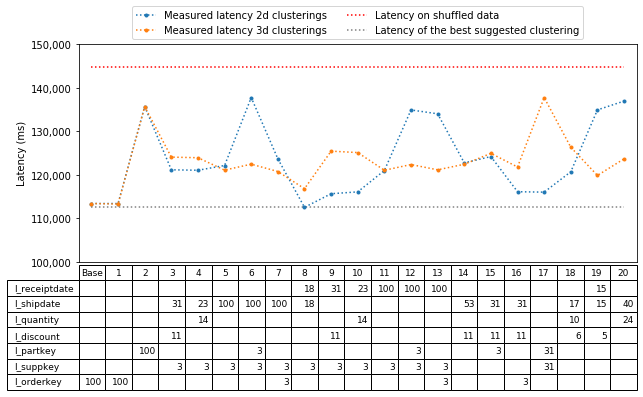

In [9]:
#latencies =      [112572, 134109, 119582, 122008, 123642, 111577, 114712, 119942, 115359, 120596, 121851, 123653, 116027, 120127, 115513, 134484, 139638, 132194, 134679, 131486, 136919]
BENCHMARK = "tpch"
THREE_D = True

fig, ax = plt.subplots(figsize=(10,5))
if BENCHMARK == "tpch":
    #latencies_2d = [113365, 113365, 135667, 121118, 122106, 123642, 122489, 115618, 120957, 116044, 121015, 122708, 124168, 116078, 120665, 115980, 134894, 140735, 132876, 133818, 132028]
    #latencies_3d = [113248, 113248, 135123, 124036, 123894, 120651, 122415, 121044, 120724, 116775, 122392, 122956, 124901, 121764, 126297, 119824, 123250, 123614, 124119, 121595, 120524]
    latency_shuffled = 144684
    ax.set_ylim(ymin=100000,ymax=150000)
    benchmark_folder = "/home/aloeser/Dokumente/repos/hyrise/benchmark_results/final/tpch/sf10-2d"
    benchmark_folder_3d = "/home/aloeser/Dokumente/repos/hyrise/benchmark_results/final/tpch/sf10-3d-corrected"
    potential_clustering_columns = ['l_receiptdate', 'l_shipdate', 'l_quantity', 'l_discount', 'l_partkey', 'l_suppkey', 'l_orderkey']
    sort_column = "l_orderkey"
    default_chunks = 916
elif BENCHMARK == "tpcds":
    #latencies_2d = [83172, 87656, 83363, 80135, 82968, 83763, 83211, 83349, 83822, 90347, 83299, 83155, 88603, 84389, 88911, 87934, 89292, 89534, 89033, 90669, 88279]
    #latencies_3d = []
    latency_shuffled = 94393
    ax.set_ylim(ymin=70000,ymax=100000)
    benchmark_folder = "/home/aloeser/Dokumente/repos/hyrise/benchmark_results/final/tpcds/sf10-2d"
    benchmark_folder_3d = "/home/aloeser/Dokumente/repos/hyrise/benchmark_results/final/tpcds/sf10-3d-corrected"
    potential_clustering_columns = ['ss_sold_date_sk', 'ss_item_sk', 'ss_hdemo_sk', 'ss_store_sk', 'ss_customer_sk', 'ss_addr_sk', 'ss_cdemo_sk', 'ss_promo_sk', 'ss_sold_time_sk', 'ss_ticket_number']
    sort_column = "ss_ticket_number"
    default_chunks = 440
else:
    raise Exception("unknown benchmark")

MILLISECONDS = 1e6
latencies = np.array(extract_average_latencies(benchmark_folder)) / MILLISECONDS
print(latencies)
if THREE_D:
    latencies_3d = np.array(extract_average_latencies(benchmark_folder_3d)) / MILLISECONDS
    print(latencies_3d)

ranks = ['Base'] + [str(x + 1) for x in range(20)]


ax.plot(latencies, label='Measured latency 2d clusterings', linestyle='dotted', marker='.')
if THREE_D:
    ax.plot(latencies_3d, label='Measured latency 3d clusterings', linestyle='dotted', marker='.')


plt.hlines(latency_shuffled, 0, 20, color='r', label='Latency on shuffled data', linestyle='dotted')
min_latency = min(latencies)
if THREE_D:
    min_latency = min(min_latency, min(latencies_3d))
plt.hlines(min(latencies), 0, 20, color='gray', label='Latency of the best suggested clustering', linestyle='dotted')
if not THREE_D and BENCHMARK == "tpch" and False:
     plt.hlines(107146, 0, 20, color='green', label='Latency of the best known clustering', linestyle='dotted')

ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Latency (ms)')
ax.set_xticks([])
#ax.set_xticklabels(ranks)
#ax.set_xlabel("Suggestion rank")

PAPER_MODE = True
if PAPER_MODE:
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width, box.height * 0.8])
    legend = ax.legend(loc="lower center", ncol=2, bbox_to_anchor=(0.5, 1))
else:
    legend = ax.legend(loc='center left', ncol=1, bbox_to_anchor=(1.0, 0.5))

if THREE_D:
    the_table = add_cluster_count_table(benchmark_folder_3d, potential_clustering_columns, ranks, ax)
else:
    the_table = add_cluster_count_table(benchmark_folder, potential_clustering_columns, ranks, ax)

plt.margins(1/42, 1/42) # no empty space on left and right within bar chart

dimension_text = "_3d" if THREE_D else ""
plt.savefig(f'/home/aloeser/Downloads/top20_latency_{BENCHMARK}{dimension_text}.pdf', bbox_extra_artists=(legend,the_table,), bbox_inches="tight")

[113365.45704265 115242.0721039  116085.11395195 111104.5338641
 109309.9847971  107439.94468245 107146.13394665]


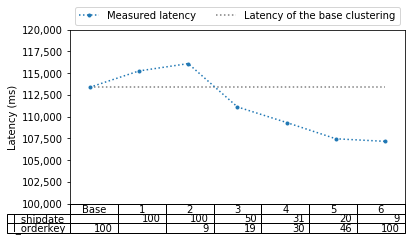

In [100]:
benchmark_folder = "/home/aloeser/Dokumente/repos/hyrise/benchmark_results/final/tpch/sf10-clustercounts"

fig, ax = plt.subplots()

latencies = np.array(extract_average_latencies(benchmark_folder)) / 1e6
print(latencies)
ax.plot(np.arange(len(latencies)), latencies, linestyle='dotted', marker='.', label='Measured latency')
ax.hlines(latencies[0], 0, 6, color='gray', label='Latency of the base clustering', linestyle='dotted')


ranks = ['Base'] + [str(x + 1) for x in range(len(latencies)-1)]
the_table = add_cluster_count_table(benchmark_folder, ['l_shipdate', 'l_orderkey'], ranks, ax)

ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Latency (ms)')
ax.set_ylim(ymin=100000,ymax=120000)

PAPER_MODE = True
if PAPER_MODE:
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width, box.height * 0.8])
    legend = ax.legend(loc="lower center", ncol=2, bbox_to_anchor=(0.5, 1))
else:
    legend = ax.legend(loc='center left', ncol=1, bbox_to_anchor=(1.0, 0.5))
    
plt.margins(1/15, 1/15)
plt.savefig(f'/home/aloeser/Downloads/eval_cluster_counts.pdf', bbox_extra_artists=(legend,the_table,), bbox_inches="tight")
plt.show()

In [13]:
def extract_operator_durations_from_pqp(pqp_folder):
    all_operator_breakdowns = {}
    for file in sorted(glob.glob(f"{pqp_folder}/*-PQP.svg")):
        operator_breakdown = {}
        with open(file, "r") as svg:
            svg_string = svg.read().replace("\n", "|")

            # Find the "total by operator" table using a non-greedy search until the end of the <g> object
            table_string = re.findall(r"Total by operator(.*?)</g>", svg_string)[0]

            # Replace all objects within the table string, also trim newlines (rewritten to |) at the begin and the end
            table_string = re.sub(r"<.*?>", "", table_string)
            table_string = re.sub(r"^\|*", "", table_string)
            table_string = re.sub(r"\|*$", "", table_string)

            row_strings = table_string.split("||")

            # The svg table stores data in a columnar orientation, so we first extract the operator names, then their
            # durations
            operator_names = []
            operator_durations = []

            for operator_name in row_strings[0].split("|"):
                operator_names.append(operator_name.strip())

            # Convert time string to nanoseconds and add to operator_durations
            for operator_duration_str in row_strings[1].split("|"):
                operator_duration = pd.Timedelta(operator_duration_str.replace("µ", "u")).total_seconds() * 1e9
                operator_durations.append(operator_duration)

            operator_breakdown = dict(zip(operator_names, operator_durations))

            # Ignore the "total" line
            del operator_breakdown["total"]

        # Store in all_operator_breakdowns
        all_operator_breakdowns[file.replace("-PQP.svg", "").replace("TPC-H_", "Q")] = operator_breakdown

    # Make operators the columns and order by operator name
    df = pd.DataFrame(all_operator_breakdowns).transpose()
    df = df.reindex(sorted(df.columns, reverse=True), axis=1)

    df = df.fillna(0)

    # Calculate share of total execution time (i.e., longer running benchmark items are weighted more)
    #df.loc["Absolute"] = df.sum() / df.count()

    # Normalize data from nanoseconds to milliseconds
    df.iloc[:, 0:] = df.iloc[:, 0:].apply(lambda x: x / 1000000, axis=1)
    
    return df

In [16]:
def extract_operator_durations_from_csv(csv_folder):
    scan_df = pd.read_csv(csv_folder + "/table_scans.csv", sep='|')
    if "tpch" in csv_folder:
        scan_df = scan_df[scan_df['TABLE_NAME'] == "lineitem"]
    elif "tpcds" in csv_folder:
        scan_df = scan_df[scan_df['TABLE_NAME'] == "store_sales"]
    scan = scan_df['RUNTIME_NS'].sum()
    
    
    aggregate_columns = "OPERATOR_TYPE|QUERY_HASH|OPERATOR_HASH|LEFT_INPUT_OPERATOR_HASH|RIGHT_INPUT_OPERATOR_HASH|COLUMN_TYPE|TABLE_NAME|COLUMN_NAME|GROUP_BY_COLUMN_COUNT|AGGREGATE_COLUMN_COUNT|INPUT_CHUNK_COUNT|INPUT_ROW_COUNT|OUTPUT_CHUNK_COUNT|OUTPUT_ROW_COUNT|GROUP_BY_KEY_PARTITIONING_NS|AGGREGATING_NS|GROUP_BY_COLUMNS_WRITING_NS|AGGREGATE_COLUMNS_WRITING_NS|OUTPUT_WRITING_NS|RUNTIME_NS|DESCRIPTION".split("|")
    aggregate_df = pd.read_csv(csv_folder + "/aggregates.csv", sep='|', names=aggregate_columns)
    aggregate_operators = aggregate_df.groupby(['QUERY_HASH', 'OPERATOR_HASH'])['RUNTIME_NS'].mean()
    aggregate = aggregate_operators.sum()
    
    join_df = pd.read_csv(csv_folder + "/joins.csv", sep='|')
    join_estimated = (join_df['BUILD_SIDE_MATERIALIZING_NS'] + join_df['PROBE_SIDE_MATERIALIZING_NS'] + join_df['PROBING_NS']).sum()
    join_unestimated = join_df['RUNTIME_NS'].sum() - join_estimated
    
    return scan, join_estimated, join_unestimated, aggregate

In [17]:
def extract_operator_durations_range(folder):
    aggregates = []
    joins_estimated = []
    joins_unestimated = []
    scans = []
    for csv_folder in sorted(glob.glob(f"{folder}/*")):
        #print(f"processing {csv_folder}")
        runtimes = extract_operator_durations_from_csv(csv_folder)
        aggregates.append(int(runtimes[3]))
        joins_estimated.append(int(runtimes[1]))
        joins_unestimated.append(int(runtimes[2]))
        scans.append(int(runtimes[0]))
    
    return np.array(aggregates), np.array(joins_estimated), np.array(joins_unestimated), np.array(scans)

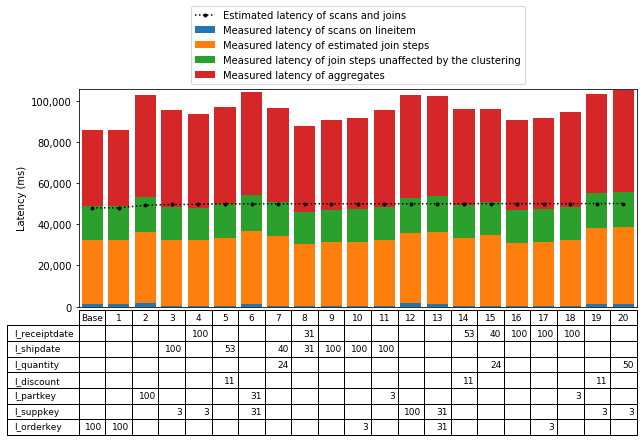

In [85]:
BENCHMARK = "tpch"
if BENCHMARK == "tpch":
    #guesses = [47420, 47420, 47998, 48936, 48952, 48960, 48963, 48965, 48965, 48965, 49008, 49020, 49028, 49037, 49037, 49037, 49371, 49376, 49400, 49400, 49400]
    guesses = [47947, 47947, 49211, 49569, 49640, 49897, 49901, 49905, 49909, 49911, 49911, 49911, 49934, 49945, 49964, 49973, 49982, 49982, 49982, 50011, 50041]
    stats_path = '/home/aloeser/Dokumente/repos/example_plugin/stats/final/tpch/sf10-2d'
    benchmark_folder = '/home/aloeser/Dokumente/repos/hyrise/benchmark_results/final/tpch/sf10-2d'
    potential_clustering_columns = ['l_receiptdate', 'l_shipdate', 'l_quantity', 'l_discount', 'l_partkey', 'l_suppkey', 'l_orderkey']
    table_name = "lineitem"
elif BENCHMARK == "tpcds":    
    guesses = [33728, 33628, 33728, 33743, 33743, 33772, 33772, 33778, 33787, 33787, 33787, 33787, 33939, 33939, 33968, 33968, 33978, 33983, 33983, 33983, 33983]    
    stats_path = '/home/aloeser/Dokumente/repos/example_plugin/stats/final/tpcds/sf10-2d-correction'
    benchmark_folder = '/home/aloeser/Dokumente/repos/hyrise/benchmark_results/final/tpcds/sf10-2d'
    potential_clustering_columns = ['ss_sold_date_sk', 'ss_item_sk', 'ss_hdemo_sk', 'ss_store_sk', 'ss_customer_sk', 'ss_addr_sk', 'ss_cdemo_sk', 'ss_promo_sk', 'ss_sold_time_sk', 'ss_ticket_number']
    table_name = "store_sales"
else:
    raise Exception("unknown benchmark")

    
aggregates, joins_estimated, joins_unestimated, scans = extract_operator_durations_range(stats_path)
MS_FACTOR = 1e6
aggregates = aggregates / MS_FACTOR
joins_estimated = joins_estimated / MS_FACTOR
joins_unestimated = joins_unestimated / MS_FACTOR
scans = scans / MS_FACTOR        
    
#scans[0] = scans[1]
#joins_estimated[0] = joins_estimated[1]
#joins_unestimated[0] = joins_unestimated[1]
#aggregates[0] = aggregates[1]


fig, ax = plt.subplots(figsize=(10,5))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
x = np.arange(len(scans))
xlabels = ['Base'] + [str(x) for x in range(1,21)]
scanbar = ax.bar(x, scans, label=f'Measured latency of scans on {table_name}')
join_estimated_bar = ax.bar(x, joins_estimated, bottom=scans, label='Measured latency of estimated join steps')
join_unestimated_bar = ax.bar(x, joins_unestimated, bottom=joins_estimated+scans, label='Measured latency of join steps unaffected by the clustering')
aggregatebar = ax.bar(x, aggregates, bottom=joins_unestimated+joins_estimated+scans, label='Measured latency of aggregates')
ax.plot(guesses, color="black", linestyle='dotted',marker='.', label='Estimated latency of scans and joins')
#ax.set_xticks(x)
ax.set_xticks([])
#ax.set_xticklabels(xlabels)
#ax.set_xlabel('Suggestion rank')
ax.set_ylabel('Latency (ms)')
ranks = ['Base'] + [str(x + 1) for x in range(20)]

PAPER_MODE = True
if PAPER_MODE:
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width, box.height * 0.8])
    legend = ax.legend(loc="lower center", ncol=1, bbox_to_anchor=(0.5, 1))
else:
    legend = ax.legend(loc='center left', ncol=1, bbox_to_anchor=(1.0, 0.5))


the_table = add_cluster_count_table(benchmark_folder, potential_clustering_columns, ranks, ax)

plt.margins(0.005, 0.005) # no empty space on left and right within bar chart
plt.savefig(f'/home/aloeser/Downloads/detailed_estimates_{BENCHMARK}.pdf', bbox_extra_artists=(legend,the_table), bbox_inches="tight")
plt.show()

In [66]:
measured_latency = scans + joins_estimated + joins_unestimated

print(stats.gmean(measured_latency / guesses))
print(min(measured_latency), max(measured_latency))
print(aggregates)
scans/measured_latency

1.0052716827953998
45721.035579 55783.95934100001
[37214.485801 37214.485801 49460.265298 46911.246311 45435.409247
 46804.415724 50036.753859 45534.143942 42095.956827 43503.273345
 43917.928125 46961.800039 49944.45753  48501.571101 46494.319481
 45333.965722 43967.565136 44077.80756  45917.33627  47812.057651
 49205.248493]


array([0.03101351, 0.03101351, 0.02999022, 0.00873278, 0.00911851,
       0.00918987, 0.02680925, 0.00603289, 0.01121294, 0.00697966,
       0.00862887, 0.00830961, 0.03015774, 0.02652015, 0.00563422,
       0.00603297, 0.00749405, 0.00915756, 0.00819484, 0.02599984,
       0.02553504])

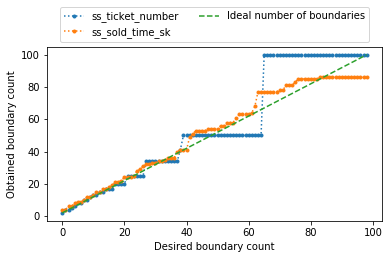

In [11]:
BENCHMARK = "tpcds"

fig, ax = plt.subplots()


column_to_counts = {}
if BENCHMARK == "tpch":
    column_to_counts['l_shipdate'] = np.array([3,4,5,6,6,7,8,9,10,11,12,14,14,16,16,17,20,20,20,21,24,24,24,24,24,26,32,32,32,32,32,32,32,32,32,34,36,47,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,49,49,58,59,61,94,94,94,94,94,94,94,94,94,94,95,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,])
    column_to_counts['l_orderkey'] = np.array([2,4,4,5,6,8,8,10,10,12,13,13,15,15,17,17,17,20,20,20,20,25,25,25,25,25,25,34,34,34,34,34,34,34,34,34,34,34,42,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,])
elif BENCHMARK == "tpcds":
    column_to_counts['ss_ticket_number'] = np.array([2,4,4,5,6,8,8,10,10,12,13,13,15,15,17,17,17,20,20,20,20,25,25,25,25,25,25,34,34,34,34,34,34,34,34,34,34,34,41,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,])
    column_to_counts['ss_sold_time_sk'] = np.array([4,4,6,6,8,9,9,10,12,12,13,15,15,17,17,18,19,21,21,22,24,24,24,25,28,29,31,32,32,33,33,34,34,35,36,36,36,40,41,41,41,49,51,53,53,53,53,54,54,54,54,56,56,58,58,58,61,63,63,63,63,64,68,77,77,77,77,77,77,77,78,78,81,81,81,83,85,85,85,85,85,85,85,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,])
else:
    raise Exception("unknown benchmark")

ideal_boundaries = np.arange(2,101)
    
NORMALIZE = False
if NORMALIZE:    
    tmp = {}
    for column, counts in column_to_counts.items():
        tmp[column] = counts / ideal_boundaries
    column_to_counts = tmp
    
    ideal_boundaries = ideal_boundaries / ideal_boundaries
    ax.set_ylabel('Relative error')    
else:
    ax.set_ylabel("Obtained boundary count")
    

for column, counts in column_to_counts.items():
    ax.plot(counts, label=column, linestyle='dotted', marker='.')
ax.plot(ideal_boundaries, label='Ideal number of boundaries', linestyle='dashed')
ax.set_xlabel('Desired boundary count')


PAPER_MODE = True
if PAPER_MODE:
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width, box.height * 0.8])
    legend = ax.legend(loc="lower center", ncol=2, bbox_to_anchor=(0.5, 1))
else:
    legend = ax.legend(loc='center left', ncol=1, bbox_to_anchor=(1.0, 0.5))

extension = '_normalized' if NORMALIZE else ''
plt.savefig(f'/home/aloeser/Downloads/cluster_boundaries_counts_{BENCHMARK}{extension}.pdf', bbox_inches='tight', bbox_extra_artists=(legend,))
plt.show()


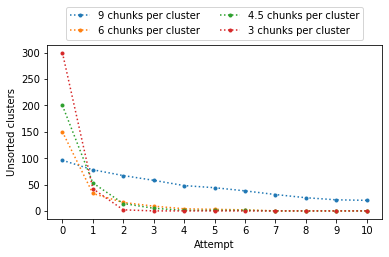

In [78]:
shipdate100          = [78, 67, 58, 48, 44, 38, 31, 25, 21, 20, ]
shipdate10orderkey30 = [42,  2,  0, 0, 0, 0, 0, 0, 0, 0, ] 
shipdate10orderkey20 = [53, 14, 5, 1, 1, 1, 0, 0, 0, 0, ]
shipdate10orderkey15 = [33, 16, 9, 4, 3, 2, 0, 0, 0, 0, ]



INCLUDE_START = True
if INCLUDE_START:
    shipdate100 = [96] + shipdate100
    shipdate10orderkey30 = [300] + shipdate10orderkey30
    shipdate10orderkey20 = [200] + shipdate10orderkey20
    shipdate10orderkey15 = [150] + shipdate10orderkey15


fig, ax = plt.subplots()


x = np.arange(len(shipdate100))
ax.set_xlabel('Attempt')
ax.set_xticks(x)
x_ticklabels = [str(x) for x in x]
ax.set_xticklabels(x_ticklabels)

ax.set_ylabel('Unsorted clusters')

ax.plot(shipdate100, label='9 chunks per cluster', linestyle='dotted', marker='.')
ax.plot(shipdate10orderkey15, label='6 chunks per cluster', linestyle='dotted', marker='.')
ax.plot(shipdate10orderkey20, label='4.5 chunks per cluster', linestyle='dotted', marker='.')
ax.plot(shipdate10orderkey30, label='3 chunks per cluster', linestyle='dotted', marker='.')




PAPER_MODE = True
if PAPER_MODE:
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width, box.height * 0.8])
    legend = ax.legend(loc="lower center", ncol=2, bbox_to_anchor=(0.5, 1))
else:
    legend = ax.legend(loc='center left', ncol=1, bbox_to_anchor=(1.0, 0.5))

plt.savefig(f'/home/aloeser/Downloads/failed_steps_after_attempt.pdf', bbox_inches='tight', bbox_extra_artists=(legend,))
plt.show()


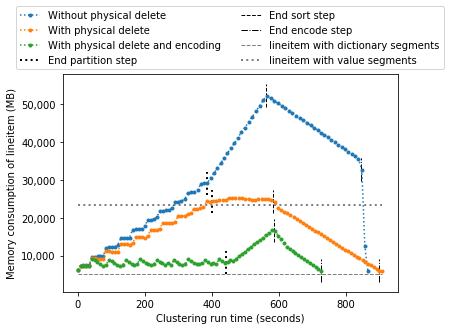

In [103]:

CONFIG = 1
SF = 10
if SF == 1:    
    bytes_used = [563591860, 2800991212, 2825378783, 2853603645, 2874713188, 2902250511, 2930221195, 2959492291, 3198286082, 3961221241, 4737458079, 5193840845, 4864270448, 4540017522, 4220256432, 3906121512, 3579064980, 580077332, 580077332, ]
    times = [37779863, 5093477753, 10152086955, 15228348282, 20335170980, 25442738584, 30571112339, 35727253005, 40912784847, 46182718470, 51461759775, 56764337432, 62048378019, 67308542176, 72545971671, 77761596151, 82956194119, 88015251180, 93065931427, ]
    phase_ends = [39486068750, 39486167232, 54961857667, 83323097011]

    bytes_used_delete = [563591860, 2800147389, 2764496406, 2724525991, 2670664041, 2629821659, 2595474154, 2542515660, 2537878180, 3301116374, 3267559680, 2362652979, 1987040259, 1664878439, 1352187921, 1043921426, 731110511, 580077332, 580077332, ]
    times_delete = [38152849, 5093386854, 10149759694, 15222055279, 20318959493, 25411908687, 30524322368, 35664264162, 40823891085, 46032811330, 51236046684, 56417380210, 61548048640, 66660123349, 71750956831, 76820661608, 81869715566, 86917755431, 91967644113, ]
    phase_ends_delete = [40524493366, 40524572571, 55207957598, 84337879953]
elif SF == 10:
    lineitem_dictionary_bytes = 5101742961
    lineitem_value_bytes = 23293954731
    if CONFIG == 1:    
        bytes_used = [6163033371, 7353824544, 7378907660, 7424845565, 7474925735, 9642471301, 9734609092, 9825662067, 9871273380, 9917381327, 12084036538, 12176645287, 12221749874, 12289164072, 12843626577, 14527396068, 14621228648, 14667180912, 14714138780, 16860252290, 16999013580, 17070383065, 17119131648, 17673824688, 19360290535, 19431385533, 19525818756, 20057846828, 21744067151, 21793471153, 21912390100, 22098856705, 22540319499, 24205119287, 24255536739, 24375632005, 24932614963, 26596936785, 26671390092, 26745324148, 27326185657, 28992656663, 29066279052, 29109919327, 30540008493, 31795674098, 33055104076, 34313196435, 35793667839, 37001649022, 38453322583, 39662641482, 41114933289, 42565838094, 43773119120, 45223534834, 46674224317, 48126627893, 49576338253, 51025742024, 52247364710, 51562676705, 50886972151, 50216829929, 49576069803, 48915181148, 48248368948, 47587001430, 46938701388, 46285542749, 45712151700, 45065846426, 44424660871, 43774300615, 43137688176, 42496687249, 41859960854, 41222784970, 40587331407, 39955317266, 39315111172, 38686120135, 38061338720, 37445182477, 36826380427, 36202415113, 35590994780, 32641821419, 12421944877, 6028716036, ]
        times = [323802022, 8664399895, 16983795112, 25329269694, 33715699809, 42144101015, 50595950565, 59080890457, 67589399526, 76137969474, 84726263715, 93337918504, 101969026739, 110631576672, 119339142558, 128088844310, 136861128739, 145655902810, 154487605884, 163370313561, 172278551198, 181210963647, 190179902157, 199190180361, 208232775299, 217298745455, 226396692410, 235536689536, 244716999050, 253916712638, 263141716355, 272417656015, 281733840389, 291083610454, 300467813311, 309885466800, 319327486430, 328807934769, 338331886966, 347889068846, 357487656086, 367111112900, 376762206101, 386459023330, 396240396925, 406098626246, 416036660121, 426049022781, 436153575485, 446330957533, 456955421727, 467295306697, 477727472809, 488243162518, 498833819226, 509513668648, 520283050656, 531140064890, 542086983370, 553119056024, 564248398103, 575306249704, 586317939653, 597283629097, 608208755053, 619086650958, 629915194837, 640698430421, 651438701675, 662133781433, 672927383651, 683535810903, 694101939065, 704623392270, 715103646888, 725536911033, 735928865968, 746273846504, 756602444757, 766861780409, 777080477298, 787252530204, 797384759676, 807475749264, 817524479171, 827528701707, 837492182844, 847443126494, 856150065194, 865042724862, ]
        phase_ends = [384904808470, 384904948441, 562020818449, 844634279568]

        bytes_used_delete = [6255319503, 7354093693, 7290824331, 7231282810, 7174502673, 9233721025, 9218090185, 9203881005, 9139001192, 9064236585, 11129663508, 11113720100, 11040548836, 10994085296, 11023062797, 13007569881, 12995653078, 12924828606, 12852797235, 13281008209, 14861407868, 14841274837, 14808847651, 14742697377, 15176474944, 16758010302, 16708255805, 16677400205, 17095408677, 18613948929, 18582460384, 18575361013, 18504393681, 18948110777, 20522139968, 20448108903, 20437544426, 20872135744, 21143393868, 22355874399, 22295818615, 22438624544, 22720642104, 24281065931, 24208973828, 24361567512, 24507086452, 24626437063, 24673387783, 24541476203, 25276382019, 25148249382, 25098826137, 25164868880, 25142245725, 24969942110, 24843032189, 24741501555, 24565702378, 24992449701, 24943665235, 24894215792, 24841221361, 24790766449, 24217434260, 22628969583, 22124331994, 21614052629, 21106615154, 20626355166, 20110072071, 19607418453, 19107720685, 18599416628, 18099485285, 17591086999, 17100330562, 16599100586, 16087832979, 15555108322, 15026460887, 14533808511, 14027613065, 13541398362, 13052828337, 12570854573, 12072561226, 11586920459, 11118930792, 10634667929, 10156840979, 9678486148, 9234501243, 8809807595, 8338347060, 7858178297, 7386493565, 6923861854, 6462045455, 6028716036, 6028716036, ]
        times_delete = [338032805, 8700823937, 17020375195, 25366569763, 33745756149, 42164858966, 50605235277, 59061973106, 67550989403, 76153202491, 84707261223, 93284549761, 101887111651, 110613420680, 119274106709, 128075052054, 136788102456, 145522375226, 154288518564, 163207210935, 172169217971, 181153783524, 190159657074, 199195327889, 208125790944, 217102634266, 226090749091, 235110849731, 244161391336, 253254007773, 262370726737, 271647825775, 280950834812, 290305190710, 299545104603, 308935657037, 318225015400, 327546366212, 336914239008, 346305418298, 355835527249, 365401613002, 374877859586, 384391028617, 393917764075, 403485806409, 413062375237, 422643848077, 432229097965, 441996085518, 451621103437, 461238126385, 470854786132, 480478093730, 490183339186, 499800205669, 509569422403, 519298297036, 529149146608, 538873726208, 548588524460, 558341313448, 568070314141, 577797195151, 587574815503, 597113098169, 606577501223, 616003936934, 625397128834, 634761306715, 644090039105, 653383187150, 662638216637, 671861545067, 681051164163, 690205923007, 699329205138, 708414082413, 717467041550, 726483054559, 735461308785, 744403533051, 753311389268, 762194892417, 771039554661, 779849553618, 788626531294, 797367823349, 806078267095, 814754959111, 823400177839, 832012057486, 840684154341, 849235544166, 857755815588, 866245133443, 874701148189, 883126485608, 891521362852, 899885825180, 908358759785, ]
        phase_ends_delete = [400535475826, 400535613422, 583680891236, 899699966405]
        
        bytes_used_delete_encoded = [6139961833, 7353891818, 7290471781, 7230962995, 7174238703, 9124016331, 8721298258, 8267334731, 7777019682, 7305240969, 7467582423, 8884824419, 8432360345, 7986883601, 7522743315, 7295760751, 7606899719, 8726556310, 8317684226, 7819296323, 7402372809, 7767064277, 8999361238, 8572556296, 8134585795, 7669505297, 7443064773, 7699255111, 8918760549, 8415283330, 8000639782, 7560049288, 7913029400, 7586984089, 8706544994, 8177778225, 7728332593, 7567345195, 7708266324, 8954775307, 8427696185, 7933138362, 7686907562, 7836894250, 7943284812, 8766857504, 8260984519, 7805318357, 8049748509, 7729608715, 9092906235, 8606147148, 8093738108, 8174948660, 8715895102, 8648152084, 9166453824, 9813758028, 10410673979, 10990372711, 11648279172, 12301056400, 12918957374, 13503570366, 14037694182, 14710081093, 15463710379, 16045311608, 16796988133, 16565366142, 15262153070, 14251364412, 13240481885, 12284298637, 11619116911, 11081227727, 10557365161, 10025870089, 9507576637, 8989236871, 8469718018, 7948752278, 7440094112, 6923967198, 6414024286, 6028716036, ]
        times_delete_encoded = [320287606, 8663154553, 16980249386, 25322210994, 33702069877, 42108603004, 50591070509, 58976487582, 67358708863, 75789533518, 84197238523, 92602548796, 101053682723, 109443493172, 117883741635, 126281307832, 134756574108, 143218965154, 151671904880, 160113447731, 168553976492, 176974312978, 185419037657, 193878056485, 202326976872, 210771604677, 219231128075, 227713393678, 236135003601, 244540817272, 252938094602, 261387778970, 269808302026, 278289831042, 286711197488, 295112324165, 303563644465, 311989193908, 320404567032, 328830531640, 337256266038, 345720851105, 354203886984, 362622329625, 371130097967, 379565707027, 387981507964, 396389979216, 404884662094, 413377948617, 421827984747, 430320357060, 438753834294, 447267997446, 455827397476, 464418547652, 472989914292, 481603666077, 490253233732, 498948278604, 507687322967, 516469234412, 525297420294, 534158381100, 543050905216, 551990709129, 560977938190, 570009093054, 579082912377, 588146945887, 597127979213, 606041287625, 614887091627, 623666406148, 632400118569, 641098207827, 649762666760, 658389655040, 666983147589, 675541558628, 684063576524, 692552064115, 701004084177, 709421935614, 717806938721, 726217543869, ]
        phase_ends_delete_encoded = [442253461003, 442253542793, 584102016743, 724043781666]

    elif CONFIG == 2:
        bytes_used = [7178180548, 28198509689, 28233432251, 28278058654, 28324420034, 28369861104, 28414636704, 28461348998, 28506373672, 28552005215, 28589861138, 28628816983, 28671130609, 28715632812, 28761287096, 28808209265, 28855590572, 28902268708, 28946367616, 28986644476, 29022731010, 29058682781, 29097553170, 29141480137, 29189982192, 29237735997, 29291571675, 29344754242, 29394520969, 29441315585, 29487237871, 29534300833, 29582385435, 29631263085, 29680207294, 29729889579, 29778715113, 29827654811, 29878134080, 29928044509, 29978671905, 30029481051, 30079792196, 30125801006, 30199625158, 31656720824, 33516480939, 35503887607, 37498591156, 39554076768, 41611471847, 43689701750, 45695860286, 47727596294, 49784354435, 51862404546, 53609839164, 52965425028, 52338370753, 51721778112, 51133386850, 50522314347, 49912621444, 49300817207, 48694646052, 48089752816, 47500940972, 46902501566, 46305296834, 45705366829, 45114507480, 44526172406, 43940629514, 43347598513, 42767385374, 42186656123, 41604143284, 41028357643, 40446856806, 39865580975, 39292317152, 38726367245, 38150633207, 37580562121, 37018238973, 36450553180, 5960901545, ]
        times = [326223540, 8708293738, 17049060061, 25409500338, 33800576447, 42213701825, 50645805213, 59111851073, 67590866249, 76094796328, 84690397690, 93225165524, 101803330717, 110409695033, 119038872381, 127680966662, 136359497678, 145042740072, 153740969068, 162465277995, 171208859751, 180043206892, 188930577889, 197814421043, 206774037110, 215766220945, 224729014714, 233722606569, 242722936516, 251759183897, 260824318661, 269914801512, 279046815932, 288214816514, 297390697936, 306610967340, 315870064163, 325187224009, 334553028658, 344004677567, 353485224196, 362974580470, 372491396664, 382195681636, 391817610181, 401537392904, 411524019752, 421491586599, 431576507663, 441777640265, 452101020970, 462544664410, 473248041116, 484070527054, 495009518171, 506062270418, 517224735098, 528205229771, 539144370176, 550046602202, 560910898208, 571729770722, 582513514871, 593256925673, 603964212105, 614627329465, 625251943642, 635833488745, 646380045789, 656880361638, 667344020599, 677760630316, 688131728581, 698463506313, 708763132552, 719021495493, 729245500649, 739427979884, 749577564600, 759682317452, 769755304419, 779792669734, 789797742873, 799763604562, 809692263217, 819582591524, 828062392991, ]
        phase_ends = [395194672921, 395204079892, 515729958748, 820564203126]

        bytes_used_delete = [7132037490, 28198347607, 28161047595, 28065983065, 28040818448, 27985432833, 27919414173, 27869283342, 27808667393, 27740842476, 27687896493, 27609735869, 27549327036, 27489130705, 27420538427, 27347123656, 27290948635, 27231380034, 27174103652, 27103371324, 27027375624, 26955137792, 26872698869, 26806560193, 26732864713, 26670326969, 26600258324, 26542053826, 26480854336, 26422200389, 26351982261, 26275984107, 26167086166, 26134580800, 26062193683, 25988019612, 25930040795, 25866088405, 25790974126, 25734272247, 25659488146, 25585873941, 25509118519, 25450636822, 25376351700, 25304471360, 25315783189, 26422703826, 25914181837, 26613182253, 25900820892, 26506619394, 25297758459, 26552385512, 26832191029, 25596913319, 26778044903, 25112674906, 26646104189, 25524442667, 22499040043, 21959151380, 21419760404, 20895564447, 20394649271, 19873000500, 19348405888, 18821159250, 18300173411, 17778398199, 17296099550, 16842228228, 16362668083, 15884921676, 15402529665, 14925439727, 14458900745, 13998602562, 13518346316, 13045895556, 12577463154, 12105159986, 11634917324, 11163447053, 10692511646, 10222265872, 9755034230, 9288750228, 8828225950, 8369987084, 7902942177, 7449924221, 6984942910, 6532979162, 6073892119, 5960901545, ]
        times_delete = [326678971, 8710204062, 17062729773, 25423294841, 33807866488, 42218994989, 50703659148, 59152300195, 67614125010, 76159822302, 84646968221, 93251196312, 101784468352, 110318757655, 118904302168, 127576766526, 136286864149, 145023659078, 153666049750, 162341945240, 171029649991, 179741193884, 188634448223, 197463882704, 206252628628, 215050868003, 224021364413, 232895537188, 241802703154, 250721024966, 259661169188, 268640409792, 277638192148, 286653481911, 295696370324, 304867553670, 313986859223, 323155866676, 332501623791, 341721181563, 351012044946, 360335276254, 369832215026, 379212009113, 388615663281, 398079367763, 407709464903, 417277871817, 426812288076, 436578463202, 446186097513, 455850014865, 465366406354, 474955262468, 484713690970, 494257121891, 503870734527, 513395469107, 523015022448, 532719695978, 542162629379, 551573822746, 560950694998, 570290841553, 579598930343, 588875608138, 598117715253, 607326323261, 616503567695, 625643338865, 634752158759, 643832747519, 652877589654, 661890621244, 670874230780, 679823608333, 688738892680, 697623165475, 706470768865, 715286268444, 724071244467, 732826266101, 741551276067, 750246158486, 758909212470, 767543261878, 776148923230, 784723026297, 793268553207, 801783446928, 810267800282, 818724271522, 827151055971, 835548942462, 843916608254, 852333614939, ]
        phase_ends_delete = [408289226522, 408298643058, 528605000915, 845929969275]
        
        bytes_used_delete_encoded = [7155109010, 28198556457, 28161350356, 28089455951, 28043642910, 27998713875, 27931506263, 27880052893, 27818700615, 27759286402, 27702461273, 27625088833, 27562977467, 27498049576, 27426203274, 27364833159, 27311696342, 27239707199, 27184430969, 27114381861, 27035492572, 26970890674, 26895010926, 26814479020, 26751862173, 26656586781, 26620946787, 26549350081, 26498478960, 26433901966, 26367311138, 26261796948, 26212221853, 26150807774, 26079646210, 26009441994, 25938675415, 25876290800, 25803423402, 25739842343, 25669721434, 25592372693, 25521250798, 25457542628, 25383036936, 25311897917, 25331410501, 24122718763, 23898165628, 24185655244, 22816444031, 23181101004, 21581005104, 22187540453, 22313996187, 21803207651, 21952526095, 22106396922, 22347742851, 23285288206, 22204198605, 21164084015, 20323217455, 19423440954, 18542778393, 17762080971, 16953619862, 16095951024, 15330840763, 14483774523, 13656070472, 12815414449, 11975004833, 11172911246, 10393771088, 9582619854, 8763174662, 7935649329, 7131114749, 6387823897, 5960901545, ]
        times_delete_encoded = [325161867, 8705929570, 17051326099, 25451416492, 33875474604, 42277181358, 50765072092, 59202571105, 67746281471, 76215509812, 84701775354, 93278405635, 101799971371, 110326229553, 118984449207, 127656199872, 136275017128, 145006284363, 153640177055, 162286660983, 171058514058, 179735556699, 188491368069, 197403684166, 206196804776, 214991492649, 223823069505, 232829683201, 241727040397, 250630165104, 259557875735, 268533864263, 277674381959, 286684138194, 295715684775, 304759435227, 313876191082, 323040237774, 332346736774, 341538988304, 350796436757, 360115927616, 369612874773, 378988891753, 388388793894, 397841221393, 407349535231, 417070543545, 426780370241, 436509744533, 446141852753, 455791078844, 465344341139, 474939329305, 484544808163, 493910428597, 503498857667, 513105760733, 522727099244, 532423112680, 542050418384, 551603342223, 560893977919, 570125777678, 579397755666, 588655801158, 597732435886, 606913580730, 616047373055, 625106682937, 633972316437, 642786642398, 651546026956, 660363254791, 669019522642, 677628738381, 686175519379, 694667389217, 703102509903, 711490851573, 719905245232, ]
        phase_ends_delete_encoded = [408000216696, 408011092944, 533658335895, 715687728967]
    else:
        raise Exception("unknown CONFIG")
else:
    raise Exception("unknown SF")

BYTE_FACTOR = 1e6
SECOND_FACTOR = 1e9
    
bytes_used = [int(x / BYTE_FACTOR) for x in bytes_used]
times = [int(x / SECOND_FACTOR) for x in times]
phase_ends = [int(x / SECOND_FACTOR) for x in phase_ends]

bytes_used_delete = [int(x / BYTE_FACTOR) for x in bytes_used_delete]
times_delete = [int(x / SECOND_FACTOR) for x in times_delete]
phase_ends_delete = [int(x / SECOND_FACTOR) for x in phase_ends_delete]

bytes_used_delete_encoded = [int(x / BYTE_FACTOR) for x in bytes_used_delete_encoded]
times_delete_encoded = [int(x / SECOND_FACTOR) for x in times_delete_encoded]
phase_ends_delete_encoded = [int(x / SECOND_FACTOR) for x in phase_ends_delete_encoded]

lineitem_dictionary_bytes = int(lineitem_dictionary_bytes / BYTE_FACTOR)
lineitem_value_bytes = int(lineitem_value_bytes / BYTE_FACTOR)

labels = ['Without physical delete', 'With physical delete', 'With physical delete and encoding']
x_values = [times, times_delete, times_delete_encoded]
y_values = [bytes_used, bytes_used_delete, bytes_used_delete_encoded]
vline_values = [phase_ends, phase_ends_delete, phase_ends_delete_encoded]

#fig, axs = plt.subplots(3, figsize=(5,10), sharex=True, sharey=True)
fig, ax = plt.subplots()
    
ax.set_xlabel('Clustering run time (seconds)')
ax.set_ylabel('Memory consumption of lineitem (MB)')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for v in range(3):
    ax.plot(x_values[v], y_values[v], label=labels[v], linestyle='dotted', marker='.')
    max_memory = max(y_values[v])

    steps = ['partition', 'merge', 'sort', 'encode']
    linestyles = ['dotted', '', 'dashed', 'dashdot']
    for index, phase_end in enumerate(vline_values[v]):
        if index == 1:
            # do not plot merge line
            continue
        time_index = bisect.bisect(x_values[v], phase_end)
        byte_low = y_values[v][time_index] - 3000
        byte_high = y_values[v][time_index] + 3000

        
        if v == 0:
            ax.vlines(phase_end, byte_low, byte_high, label=f'End {steps[index]} step', linestyle=linestyles[index], linewidth=2 if index == 0 else 1)
        else:
            ax.vlines(phase_end, byte_low, byte_high, linestyle=linestyles[index], linewidth=2 if index == 0 else 1)


max_x_values = max(max(x_values[0]), max(x_values[1]), max(x_values[2]) )
ax.hlines(lineitem_dictionary_bytes, 0, max_x_values, label='lineitem with dictionary segments', linestyle='dashed', color='gray', linewidth=1)
ax.hlines(lineitem_value_bytes, 0, max_x_values, label='lineitem with value segments', linestyle='dotted', color='gray', linewidth=2)

PAPER_MODE = True
if PAPER_MODE:
    box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width, box.height * 0.8])
    legend = ax.legend(loc="lower center", ncol=2, bbox_to_anchor=(0.5, 1))
else:
    legend = ax.legend(loc='center left', ncol=1, bbox_to_anchor=(1.0, 0.5))

plt.savefig(f'/home/aloeser/Downloads/memory_consumption{CONFIG}.pdf', bbox_inches='tight', bbox_extra_artists=(legend,))
plt.show()